<a href="https://colab.research.google.com/github/mifta10/Python-Data-Science-Project/blob/main/Dissertation_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.0 MB/s eta 0:00:00


In [2]:
# data analysis and manipulation libraries
import numpy as np
import pandas as pd
from datetime import timedelta
# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
# libraries for nlp tasks
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Model used for Sentiment Analysis
from nltk.sentiment import SentimentIntensityAnalyzer
# For topic modelling
import gensim
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.gensim
from gensim.corpora.dictionary import Dictionary
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
# for storing objects as pickle files
import pickle
# Counting items in a list and returning as a dictionary
from collections import Counter
# library for statistical analysis
from scipy import stats
# Disable all warnings
import warnings
warnings.filterwarnings("ignore")
#import imaging Library
from PIL import Image

In [3]:
# importing the dataset
df = pd.read_csv("/content/combined_df_v2_2023.csv")

# **EDA**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817399 entries, 0 to 817398
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           817399 non-null  object 
 1   id             817399 non-null  float64
 2   content        817399 non-null  object 
 3   username       817395 non-null  object 
 4   like_count     817399 non-null  int64  
 5   retweet_count  817399 non-null  int64  
 6   year           817399 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 43.7+ MB


In [5]:
df.head()

,date,id,content,username,like_count,retweet_count,year
0,2023-03-29 22:58:21+00:00,1.641213e+18,"Free AI marketing and automation tools, strate...",RealProfitPros,0,0,2023
1,2023-03-29 22:58:18+00:00,1.641213e+18,@MecoleHardman4 Chat GPT says it’s 15. 😂,AmyLouWho321,0,0,2023
2,2023-03-29 22:57:53+00:00,1.641213e+18,https://t.co/FjJSprt0te - Chat with any PDF!\n...,yjleon1976,0,0,2023
3,2023-03-29 22:57:52+00:00,1.641213e+18,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0,0,2023
4,2023-03-29 22:57:26+00:00,1.641213e+18,Most people haven't heard of Chat GPT yet.\nFi...,nikocosmonaut,0,0,2023


In [6]:
# Checking for missing values
print(df.isnull().sum())


date             0
id               0
content          0
username         4
like_count       0
retweet_count    0
year             0
dtype: int64


In [7]:
# Descriptive statistics for numeric columns
print(df.describe())

                 id     like_count  retweet_count      year
count  8.173990e+05  817399.000000  817399.000000  817399.0
mean   1.193966e+18      14.482209      81.940032    2023.0
std    7.205737e+17     170.867521     975.257215       0.0
min    1.000000e+03       0.000000       0.000000    2023.0
25%    9.428000e+03       0.000000       0.000000    2023.0
50%    1.622772e+18       2.000000       0.000000    2023.0
75%    1.634704e+18      19.000000      13.000000    2023.0
max    1.657174e+18   64094.000000   42548.000000    2023.0


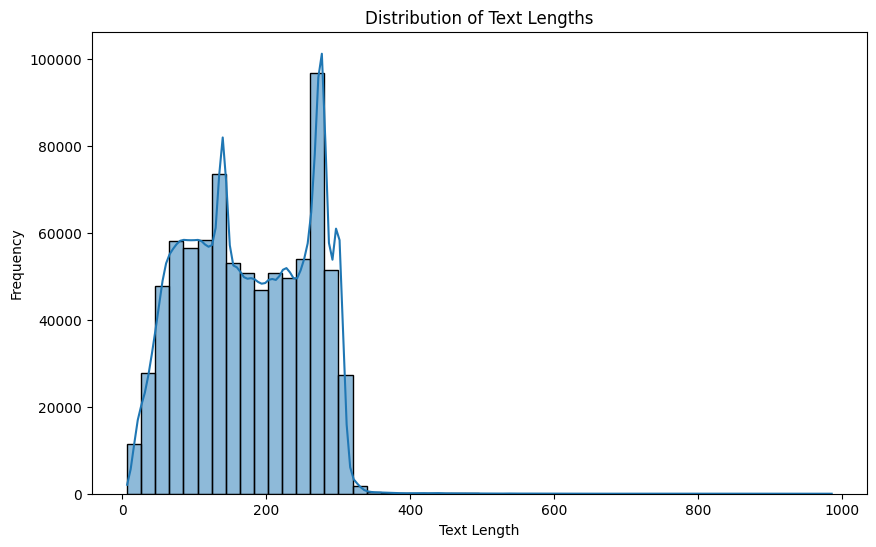

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the length of each text entry
df['text_length'] = df['content'].apply(len)

# Plotting the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


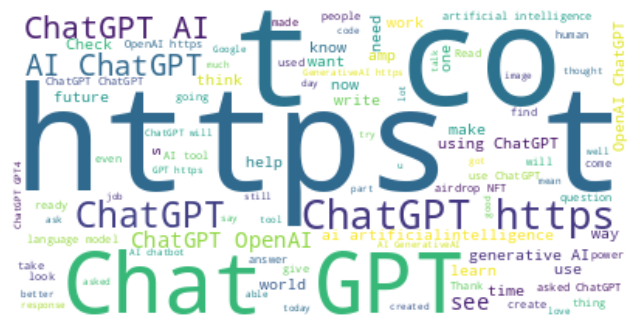

In [23]:
from wordcloud import WordCloud

# Join all text items into one large string
text = ' '.join(df['content'].dropna())

# Create and display a word cloud
wordcloud = WordCloud(background_color='white', max_words=100).generate(text)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


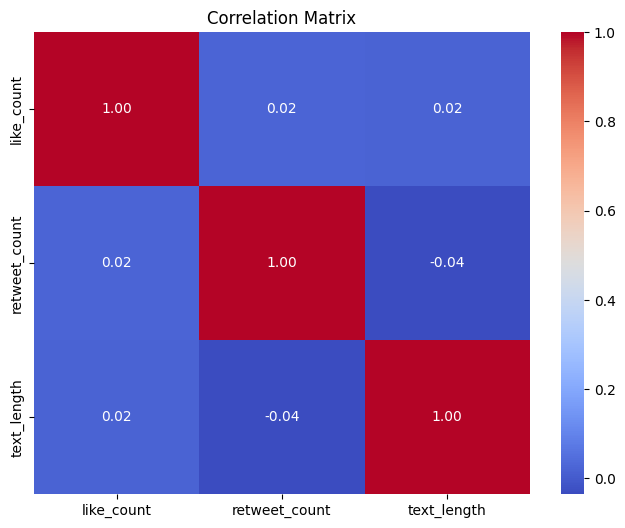

In [24]:
# Correlation matrix of numerical features
correlation_matrix = df[['like_count', 'retweet_count', 'text_length']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


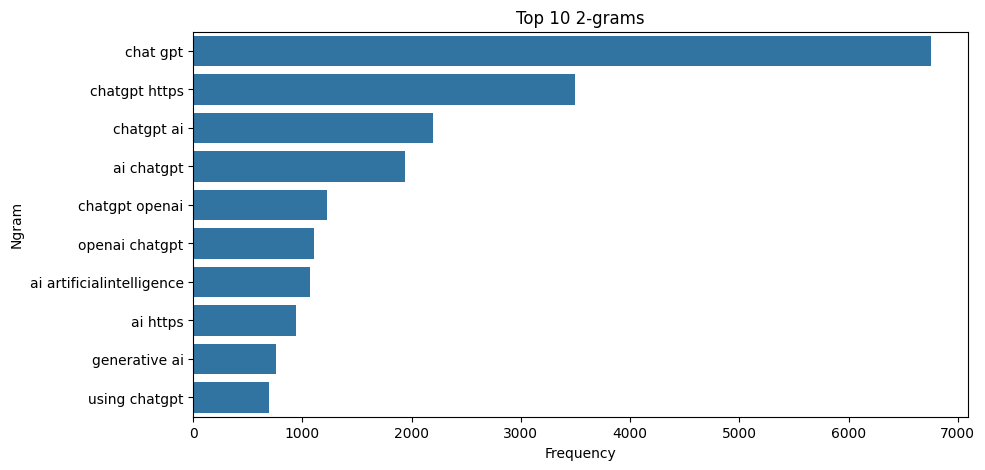

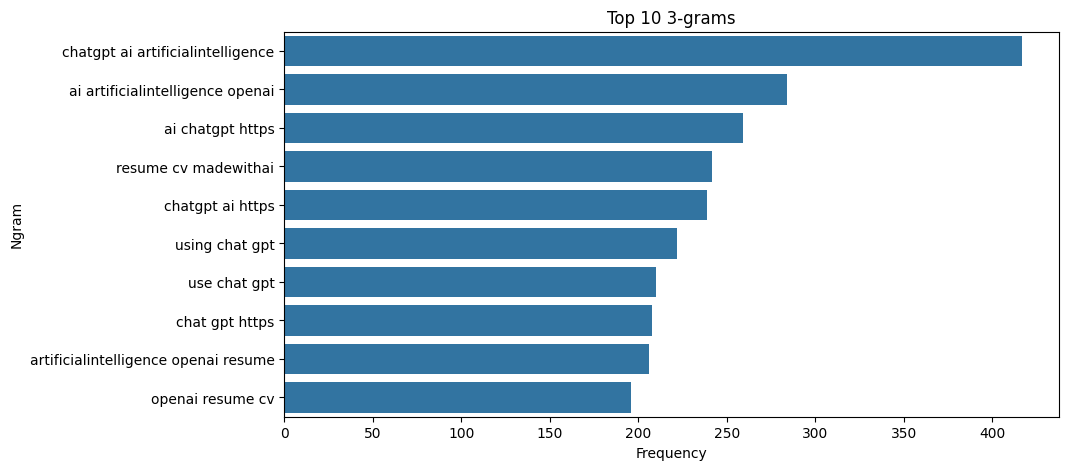

5936

In [25]:
import gc  # Garbage collection

# Sample a subset of the data, e.g., 5% of the data for EDA
df_sample = df.sample(frac=0.05, random_state=42)

# Function to generate and plot top N-grams
def plot_top_ngrams_barchart(text, n=2, top_k=10):
    c_vec = CountVectorizer(ngram_range=(n, n), stop_words='english', max_features=20000)
    ngrams = c_vec.fit_transform(text)
    sum_ngrams = ngrams.sum(axis=0)
    all_ngrams = [(word, sum_ngrams[0, idx]) for word, idx in c_vec.vocabulary_.items()]
    all_ngrams = sorted(all_ngrams, key=lambda x: x[1], reverse=True)[:top_k]
    df_ngram = pd.DataFrame(all_ngrams, columns=['Ngram', 'Frequency'])

    plt.figure(figsize=(10, 5))
    sns.barplot(x='Frequency', y='Ngram', data=df_ngram)
    plt.title(f'Top {top_k} {n}-grams')
    plt.show()

# Call the function to plot bigrams
plot_top_ngrams_barchart(df_sample['content'].dropna(), n=2)

# Call the function to plot trigrams
plot_top_ngrams_barchart(df_sample['content'].dropna(), n=3)

# Clear unused variables and collect garbage
del df_sample
gc.collect()

# **Data Preprocess**

In [8]:
def convert_to_datetime(x):
    try:
        return pd.to_datetime(x)
    except:
        return np.nan
df['date'] = df['date'].apply(lambda x: convert_to_datetime(x))
print("Null values Count, Prior to any Processing:")
print(df.isnull().sum())
df = df.dropna()
df["date only"] = df["date"].dt.date
df = df.drop("id", axis=1) #id not providing any useful information
print("Null values Count, After Processing:")
print(df.isnull().sum())
df.head(5)

Null values Count, Prior to any Processing:
date             0
id               0
content          0
username         4
like_count       0
retweet_count    0
year             0
dtype: int64
Null values Count, After Processing:
date             0
content          0
username         0
like_count       0
retweet_count    0
year             0
date only        0
dtype: int64


,date,content,username,like_count,retweet_count,year,date only
0,2023-03-29 22:58:21+00:00,"Free AI marketing and automation tools, strate...",RealProfitPros,0,0,2023,2023-03-29
1,2023-03-29 22:58:18+00:00,@MecoleHardman4 Chat GPT says it’s 15. 😂,AmyLouWho321,0,0,2023,2023-03-29
2,2023-03-29 22:57:53+00:00,https://t.co/FjJSprt0te - Chat with any PDF!\n...,yjleon1976,0,0,2023,2023-03-29
3,2023-03-29 22:57:52+00:00,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0,0,2023,2023-03-29
4,2023-03-29 22:57:26+00:00,Most people haven't heard of Chat GPT yet.\nFi...,nikocosmonaut,0,0,2023,2023-03-29


In [9]:
# prompt: convert df into csv

df.to_csv('output.csv', index=False)


In [10]:
# Display the data types and some general information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817395 entries, 0 to 817398
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   date           817395 non-null  datetime64[ns, UTC]
 1   content        817395 non-null  object             
 2   username       817395 non-null  object             
 3   like_count     817395 non-null  int64              
 4   retweet_count  817395 non-null  int64              
 5   year           817395 non-null  int64              
 6   date only      817395 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 49.9+ MB


In [11]:
# Function to lowercase the text
def lowercase_text(text):
    return text.lower()

# Apply the function to the content column
df['content_lower'] = df['content'].apply(lowercase_text)

# Display the first few entries of the lowercased content
df[['content', 'content_lower']].head()

,content,content_lower
0,"Free AI marketing and automation tools, strate...","free ai marketing and automation tools, strate..."
1,@MecoleHardman4 Chat GPT says it’s 15. 😂,@mecolehardman4 chat gpt says it’s 15. 😂
2,https://t.co/FjJSprt0te - Chat with any PDF!\n...,https://t.co/fjjsprt0te - chat with any pdf!\n...
3,"AI muses: ""In the court of life, we must all f...","ai muses: ""in the court of life, we must all f..."
4,Most people haven't heard of Chat GPT yet.\nFi...,most people haven't heard of chat gpt yet.\nfi...


In [12]:
# Function to remove URLs from text
def remove_urls(text):
    return re.sub(r'http\S+', '', text)  # Regex to find and replace URLs

# Apply the function to remove URLs from the lowercased content
df['content_no_urls'] = df['content_lower'].apply(remove_urls)

# Display the first few entries to verify URLs are removed
df[['content_lower', 'content_no_urls']].head()


,content_lower,content_no_urls
0,"free ai marketing and automation tools, strate...","free ai marketing and automation tools, strate..."
1,@mecolehardman4 chat gpt says it’s 15. 😂,@mecolehardman4 chat gpt says it’s 15. 😂
2,https://t.co/fjjsprt0te - chat with any pdf!\n...,- chat with any pdf!\ncheck out how this new ...
3,"ai muses: ""in the court of life, we must all f...","ai muses: ""in the court of life, we must all f..."
4,most people haven't heard of chat gpt yet.\nfi...,most people haven't heard of chat gpt yet.\nfi...


In [13]:
# Function to remove Twitter handles from text
def remove_handles(text):
    return re.sub(r'@\w+', '', text)  # Regex to find and replace Twitter handles

# Apply the function to remove Twitter handles from the content
df['content_no_handles'] = df['content_no_urls'].apply(remove_handles)

# Display the first few entries to verify Twitter handles are removed
df[['content_no_urls', 'content_no_handles']].head()


,content_no_urls,content_no_handles
0,"free ai marketing and automation tools, strate...","free ai marketing and automation tools, strate..."
1,@mecolehardman4 chat gpt says it’s 15. 😂,chat gpt says it’s 15. 😂
2,- chat with any pdf!\ncheck out how this new ...,- chat with any pdf!\ncheck out how this new ...
3,"ai muses: ""in the court of life, we must all f...","ai muses: ""in the court of life, we must all f..."
4,most people haven't heard of chat gpt yet.\nfi...,most people haven't heard of chat gpt yet.\nfi...


In [14]:
# Function to remove hashtags from text
def remove_hashtags(text):
    return re.sub(r'#\w+', '', text)  # Regex to find and replace hashtags

# Apply the function to remove hashtags from the content
df['content_no_hashtags'] = df['content_no_handles'].apply(remove_hashtags)

# Display the first few entries to verify hashtags are removed
df[['content_no_handles', 'content_no_hashtags']].head()


,content_no_handles,content_no_hashtags
0,"free ai marketing and automation tools, strate...","free ai marketing and automation tools, strate..."
1,chat gpt says it’s 15. 😂,chat gpt says it’s 15. 😂
2,- chat with any pdf!\ncheck out how this new ...,- chat with any pdf!\ncheck out how this new ...
3,"ai muses: ""in the court of life, we must all f...","ai muses: ""in the court of life, we must all f..."
4,most people haven't heard of chat gpt yet.\nfi...,most people haven't heard of chat gpt yet.\nfi...


In [15]:
# Function to remove special characters from text
def remove_special_characters(text):
    return re.sub(r'[^\w\s]', '', text)  # Regex to remove anything not a word character or space

# Apply the function to remove special characters from the content
df['content_clean'] = df['content_no_hashtags'].apply(remove_special_characters)

# Display the first few entries to verify special characters are removed
df[['content_no_hashtags', 'content_clean']].head()


,content_no_hashtags,content_clean
0,"free ai marketing and automation tools, strate...",free ai marketing and automation tools strateg...
1,chat gpt says it’s 15. 😂,chat gpt says its 15
2,- chat with any pdf!\ncheck out how this new ...,chat with any pdf\ncheck out how this new ai...
3,"ai muses: ""in the court of life, we must all f...",ai muses in the court of life we must all face...
4,most people haven't heard of chat gpt yet.\nfi...,most people havent heard of chat gpt yet\nfirs...


In [16]:
# Function to remove numbers from text
def remove_numbers(text):
    return re.sub(r'\d+', '', text)  # Regex to remove digits

# Apply the function to remove numbers from the content
df['content_no_numbers'] = df['content_clean'].apply(remove_numbers)

# Display the first few entries to verify numbers are removed
df[['content_clean', 'content_no_numbers']].head()


,content_clean,content_no_numbers
0,free ai marketing and automation tools strateg...,free ai marketing and automation tools strateg...
1,chat gpt says its 15,chat gpt says its
2,chat with any pdf\ncheck out how this new ai...,chat with any pdf\ncheck out how this new ai...
3,ai muses in the court of life we must all face...,ai muses in the court of life we must all face...
4,most people havent heard of chat gpt yet\nfirs...,most people havent heard of chat gpt yet\nfirs...


In [17]:

# Ensure the necessary NLTK tokenizer resource is downloaded
nltk.download('punkt')

# Function to tokenize text
def tokenize_text(text):
    return word_tokenize(text)

# Apply the function to tokenize the content
df['tokens'] = df['content_no_numbers'].apply(tokenize_text)

# Display the first few entries to verify tokenization
df[['content_no_numbers', 'tokens']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,content_no_numbers,tokens
0,free ai marketing and automation tools strateg...,"[free, ai, marketing, and, automation, tools, ..."
1,chat gpt says its,"[chat, gpt, says, its]"
2,chat with any pdf\ncheck out how this new ai...,"[chat, with, any, pdf, check, out, how, this, ..."
3,ai muses in the court of life we must all face...,"[ai, muses, in, the, court, of, life, we, must..."
4,most people havent heard of chat gpt yet\nfirs...,"[most, people, havent, heard, of, chat, gpt, y..."


In [18]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords resource
nltk.download('stopwords')

# Load NLTK's English stop words
stop_words_nltk = set(stopwords.words('english'))

# Function to remove stop words using NLTK's list
def remove_stop_words_nltk(tokens):
    return [word for word in tokens if word not in stop_words_nltk]

# Apply the function to remove stop words from the tokens
# Changed 'tokens_simple' to 'tokens' to match the existing column name
df['tokens_no_stopwords_nltk'] = df['tokens'].apply(remove_stop_words_nltk)

# Display the first few entries to verify stop words are removed
df[['tokens', 'tokens_no_stopwords_nltk']].head() # Changed 'tokens_simple' to 'tokens'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,tokens,tokens_no_stopwords_nltk
0,"[free, ai, marketing, and, automation, tools, ...","[free, ai, marketing, automation, tools, strat..."
1,"[chat, gpt, says, its]","[chat, gpt, says]"
2,"[chat, with, any, pdf, check, out, how, this, ...","[chat, pdf, check, new, ai, quickly, answers, ..."
3,"[ai, muses, in, the, court, of, life, we, must...","[ai, muses, court, life, must, face, judge, de..."
4,"[most, people, havent, heard, of, chat, gpt, y...","[people, havent, heard, chat, gpt, yet, first,..."


In [19]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Ensure the necessary NLTK resources are downloaded
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Function to lemmatize text
def lemmatize_text(tokens):
    nltk_pos_tagged = nltk.pos_tag(tokens)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_pos_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return lemmatized_sentence

# Apply the function to lemmatize the tokens
df['lemmatized_tokens'] = df['tokens_no_stopwords_nltk'].apply(lemmatize_text)

# Display the first few entries to verify lemmatization
df[['tokens_no_stopwords_nltk', 'lemmatized_tokens']].head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,tokens_no_stopwords_nltk,lemmatized_tokens
0,"[free, ai, marketing, automation, tools, strat...","[free, ai, marketing, automation, tool, strate..."
1,"[chat, gpt, says]","[chat, gpt, say]"
2,"[chat, pdf, check, new, ai, quickly, answers, ...","[chat, pdf, check, new, ai, quickly, answer, q..."
3,"[ai, muses, court, life, must, face, judge, de...","[ai, mus, court, life, must, face, judge, dest..."
4,"[people, havent, heard, chat, gpt, yet, first,...","[people, havent, hear, chat, gpt, yet, first, ..."


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817395 entries, 0 to 817398
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   date                      817395 non-null  datetime64[ns, UTC]
 1   content                   817395 non-null  object             
 2   username                  817395 non-null  object             
 3   like_count                817395 non-null  int64              
 4   retweet_count             817395 non-null  int64              
 5   year                      817395 non-null  int64              
 6   date only                 817395 non-null  object             
 7   content_lower             817395 non-null  object             
 8   content_no_urls           817395 non-null  object             
 9   content_no_handles        817395 non-null  object             
 10  content_no_hashtags       817395 non-null  object             
 11  conte

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine tokens into single string per document
df['lemmatized_text'] = df['lemmatized_tokens'].apply(lambda x: ' '.join(x))

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000,  # Limit number of features to keep
                                   min_df=5,           # Ignore terms that appear in less than 5 documents
                                   max_df=0.7)         # Ignore terms that appear in more than 70% of the documents

# Fit and transform the lemmatized text
tfidf_features = tfidf_vectorizer.fit_transform(df['lemmatized_text'])

# This creates a matrix of TF-IDF features ready for modeling


In [27]:
# Print the column names of the dataset
print(df.columns)

Index(['date', 'content', 'username', 'like_count', 'retweet_count', 'year',
       'date only', 'content_lower', 'content_no_urls', 'content_no_handles',
       'content_no_hashtags', 'content_clean', 'content_no_numbers', 'tokens',
       'tokens_no_stopwords_nltk', 'lemmatized_tokens', 'text_length',
       'lemmatized_text'],
      dtype='object')


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817395 entries, 0 to 817398
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   date                      817395 non-null  datetime64[ns, UTC]
 1   content                   817395 non-null  object             
 2   username                  817395 non-null  object             
 3   like_count                817395 non-null  int64              
 4   retweet_count             817395 non-null  int64              
 5   year                      817395 non-null  int64              
 6   date only                 817395 non-null  object             
 7   content_lower             817395 non-null  object             
 8   content_no_urls           817395 non-null  object             
 9   content_no_handles        817395 non-null  object             
 10  content_no_hashtags       817395 non-null  object             
 11  conte

In [29]:
df.isnull().sum()

,0
date,0
content,0
username,0
like_count,0
retweet_count,0
year,0
date only,0
content_lower,0
content_no_urls,0
content_no_handles,0


In [30]:
# Select a random subset of 10,000 entries for initial testing
subset = df.sample(n=100000, random_state=42)  # 'random_state' ensures the reproducibility of your sample

# Save the subset to a new CSV file for easier access and processing
subset_file_path = 'path_to_your_subset_dataset.csv'  # Replace with your desired path for the subset
subset.to_csv(subset_file_path, index=False)

print(f"Subset saved to {subset_file_path}")

Subset saved to path_to_your_subset_dataset.csv


In [31]:
subset_df = pd.read_csv('/content/path_to_your_subset_dataset.csv')

In [32]:
subset_df.isnull().sum()

,0
date,0
content,0
username,0
like_count,0
retweet_count,0
year,0
date only,0
content_lower,0
content_no_urls,10
content_no_handles,10


In [34]:
# prompt: drop missing values rows

# Drop rows with any missing values
subset_df.dropna(inplace=True)

In [35]:
subset_df.isnull().sum()

,0
date,0
content,0
username,0
like_count,0
retweet_count,0
year,0
date only,0
content_lower,0
content_no_urls,0
content_no_handles,0


In [36]:
from textblob import TextBlob
import pandas as pd

# Define a function to get the sentiment
def get_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    # Get the sentiment polarity
    polarity = blob.sentiment.polarity
    # Return sentiment label based on polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [37]:
# Apply the function to your text data column
subset_df['sentiment'] = subset_df['lemmatized_text'].apply(get_sentiment)

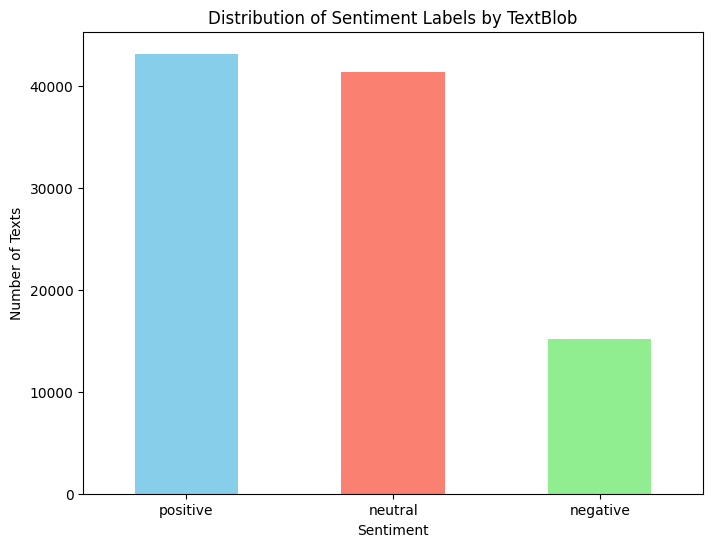

In [38]:
# Count the sentiment labels
label_counts = subset_df['sentiment'].value_counts()

# Plot the distribution of labels
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Sentiment Labels by TextBlob')
plt.xlabel('Sentiment')
plt.ylabel('Number of Texts')
plt.xticks(rotation=0)
plt.show()


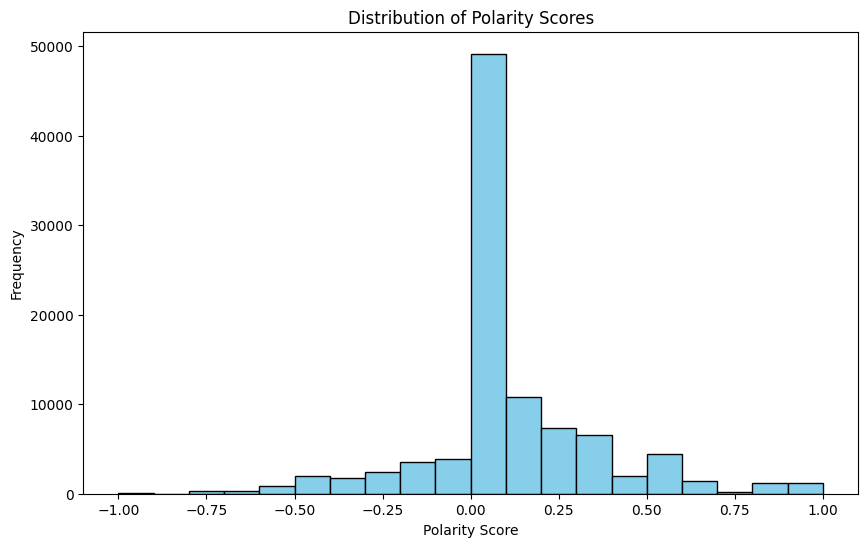

In [39]:
# Calculate polarity scores
subset_df['polarity'] = subset_df['lemmatized_text'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Plotting the polarity distribution
plt.figure(figsize=(10, 6))
plt.hist(subset_df['polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()


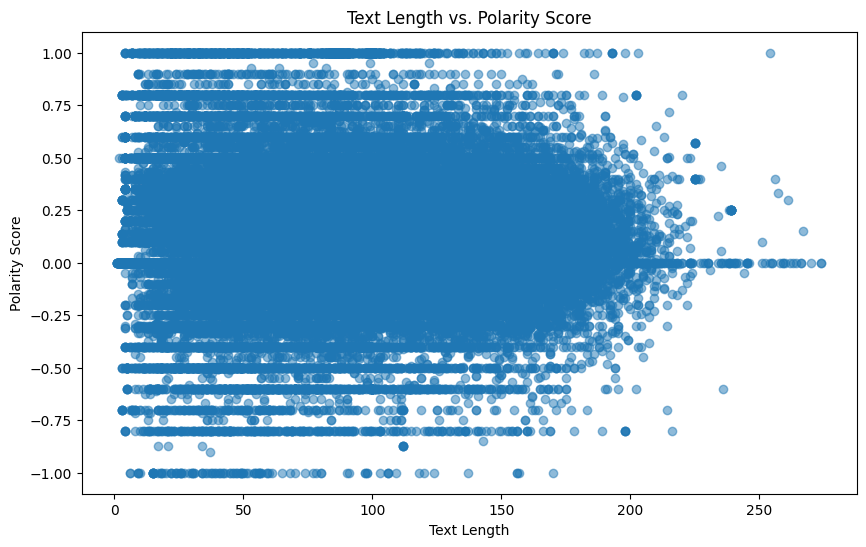

In [40]:
# Example of plotting text length vs. polarity
subset_df['text_length'] = subset_df['lemmatized_text'].apply(len)

plt.figure(figsize=(10, 6))
plt.scatter(subset_df['text_length'], subset_df['polarity'], alpha=0.5)
plt.title('Text Length vs. Polarity Score')
plt.xlabel('Text Length')
plt.ylabel('Polarity Score')
plt.show()


In [41]:
subset_df.head(5)

,date,content,username,like_count,retweet_count,year,date only,content_lower,content_no_urls,content_no_handles,content_no_hashtags,content_clean,content_no_numbers,tokens,tokens_no_stopwords_nltk,lemmatized_tokens,text_length,lemmatized_text,sentiment,polarity
0,2023-01-17 16:57:01+00:00,#Microsoft to add OpenAI's ChatGPT to #Azure s...,KIDataApp,2,2,2023,2023-01-17,#microsoft to add openai's chatgpt to #azure s...,#microsoft to add openai's chatgpt to #azure s...,#microsoft to add openai's chatgpt to #azure s...,to add openai's chatgpt to service 'soon' as...,to add openais chatgpt to service soon as th...,to add openais chatgpt to service soon as th...,"['to', 'add', 'openais', 'chatgpt', 'to', 'ser...","['add', 'openais', 'chatgpt', 'service', 'soon...","['add', 'openais', 'chatgpt', 'service', 'soon...",187,add openais chatgpt service soon company consi...,positive,0.135714
1,2023-04-07 06:59:24+00:00,@DogWalkBarstool @BarstoolChief let’s just say...,Lightning_Mcqueen_95_43,2,0,2023,2023-04-07,@dogwalkbarstool @barstoolchief let’s just say...,@dogwalkbarstool @barstoolchief let’s just say...,let’s just say chatgpt did not do too hot on...,let’s just say chatgpt did not do too hot on...,lets just say chatgpt did not do too hot on ...,lets just say chatgpt did not do too hot on ...,"['lets', 'just', 'say', 'chatgpt', 'did', 'not...","['lets', 'say', 'chatgpt', 'hot', 'python', 'c...","['let', 'say', 'chatgpt', 'hot', 'python', 'co...",78,let say chatgpt hot python cod exam good think...,positive,0.475000
2,2023-02-12 18:03:52+00:00,The latest Digitalscouting's Insurtech Weekly!...,stratorob,1,0,2023,2023-02-12,the latest digitalscouting's insurtech weekly!...,the latest digitalscouting's insurtech weekly!...,the latest digitalscouting's insurtech weekly!...,the latest digitalscouting's insurtech weekly!...,the latest digitalscoutings insurtech weekly ...,the latest digitalscoutings insurtech weekly ...,"['the', 'latest', 'digitalscoutings', 'insurte...","['latest', 'digitalscoutings', 'insurtech', 'w...","['late', 'digitalscoutings', 'insurtech', 'wee...",45,late digitalscoutings insurtech weekly thanks,negative,-0.050000
3,2023-03-10 12:32:16+00:00,GPT-4 is coming next week. It will be multimod...,chugh_ritesh,1,0,2023,2023-03-10,gpt-4 is coming next week. it will be multimod...,gpt-4 is coming next week. it will be multimod...,gpt-4 is coming next week. it will be multimod...,gpt-4 is coming next week. it will be multimod...,gpt4 is coming next week it will be multimodal...,gpt is coming next week it will be multimodal ...,"['gpt', 'is', 'coming', 'next', 'week', 'it', ...","['gpt', 'coming', 'next', 'week', 'multimodal'...","['gpt', 'come', 'next', 'week', 'multimodal', ...",55,gpt come next week multimodal technological ga...,positive,0.150000
4,2023-02-01 01:39:01+00:00,Just tried #ChatGPT for the first time. Studen...,ProfessorOrozco,2,0,2023,2023-02-01,just tried #chatgpt for the first time. studen...,just tried #chatgpt for the first time. studen...,just tried #chatgpt for the first time. studen...,just tried for the first time. students are a...,just tried for the first time students are al...,just tried for the first time students are al...,"['just', 'tried', 'for', 'the', 'first', 'time...","['tried', 'first', 'time', 'students', 'asked'...","['try', 'first', 'time', 'student', 'ask', 'pr...",119,try first time student ask prepare demand latt...,positive,0.169444


In [42]:
# Assuming 'lemmatized_text' is the column with the preprocessed text
text_data = subset_df['lemmatized_text']  # Update column name if different

# Initialize a TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features, adjust as needed

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(text_data)

In [43]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99633 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      99633 non-null  object 
 1   content                   99633 non-null  object 
 2   username                  99633 non-null  object 
 3   like_count                99633 non-null  int64  
 4   retweet_count             99633 non-null  int64  
 5   year                      99633 non-null  int64  
 6   date only                 99633 non-null  object 
 7   content_lower             99633 non-null  object 
 8   content_no_urls           99633 non-null  object 
 9   content_no_handles        99633 non-null  object 
 10  content_no_hashtags       99633 non-null  object 
 11  content_clean             99633 non-null  object 
 12  content_no_numbers        99633 non-null  object 
 13  tokens                    99633 non-null  object 
 14  tokens_no_s

In [44]:
from sklearn.model_selection import train_test_split
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(tfidf_matrix, subset_df['sentiment'], test_size=0.3, random_state=42)  # Replace 'your_label_column' with the actual label column
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now X_train, X_val, X_test, y_train, y_val, and y_test are ready for model training and evaluation.

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Example using Logistic Regression
model = LogisticRegression(max_iter=1000)  # Increase max_iter if the model doesn't converge

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9379725660756105
Classification Report:
               precision    recall  f1-score   support

    negative       0.92      0.79      0.85      2238
     neutral       0.93      0.99      0.96      6140
    positive       0.96      0.94      0.95      6567

    accuracy                           0.94     14945
   macro avg       0.93      0.91      0.92     14945
weighted avg       0.94      0.94      0.94     14945



In [46]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='linear', C=1.0)  # 'C' is the regularization parameter, adjust as needed

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", report_svm)


SVM Accuracy: 0.9581799933087989
SVM Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.87      0.89      2238
     neutral       0.96      0.99      0.98      6140
    positive       0.97      0.96      0.96      6567

    accuracy                           0.96     14945
   macro avg       0.95      0.94      0.94     14945
weighted avg       0.96      0.96      0.96     14945



In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Train the Naive Bayes model
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Classification Report:\n", report_nb)


Naive Bayes Accuracy: 0.7926396788223486
Naive Bayes Classification Report:
               precision    recall  f1-score   support

    negative       0.92      0.32      0.48      2238
     neutral       0.91      0.78      0.84      6140
    positive       0.71      0.96      0.82      6567

    accuracy                           0.79     14945
   macro avg       0.85      0.69      0.71     14945
weighted avg       0.83      0.79      0.78     14945



In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 'n_estimators' controls the number of trees in the forest

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", report_rf)


Random Forest Accuracy: 0.9208430913348946
Random Forest Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.71      0.80      2238
     neutral       0.93      0.98      0.95      6140
    positive       0.92      0.94      0.93      6567

    accuracy                           0.92     14945
   macro avg       0.92      0.88      0.89     14945
weighted avg       0.92      0.92      0.92     14945



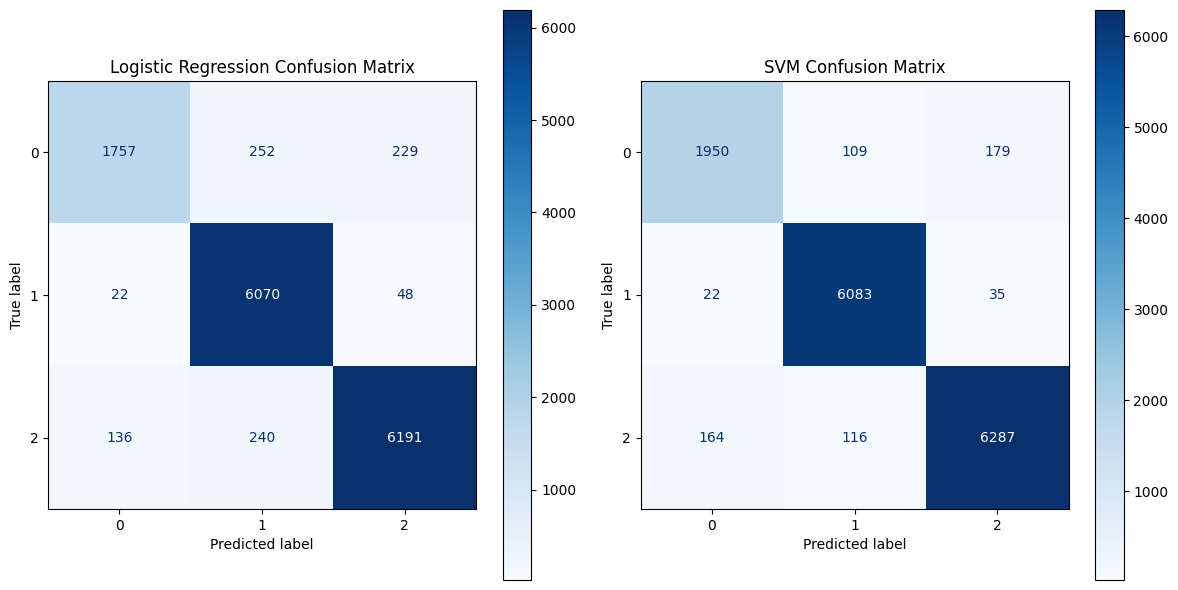

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example predictions (replace these with your actual data)
# y_pred_lr, y_pred_svm from your logistic regression and SVM models
# y_test is your true labels

# Compute confusion matrices
cm_lr = confusion_matrix(y_test, y_pred)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Define the figure for plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot Logistic Regression Confusion Matrix
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True label')

# Plot SVM Confusion Matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(ax=axes[1], cmap=plt.cm.Blues)
axes[1].set_title('SVM Confusion Matrix')
axes[1].set_xlabel('Predicted label')
axes[1].set_ylabel('True label')

# Adjust layout
plt.tight_layout()
plt.show()


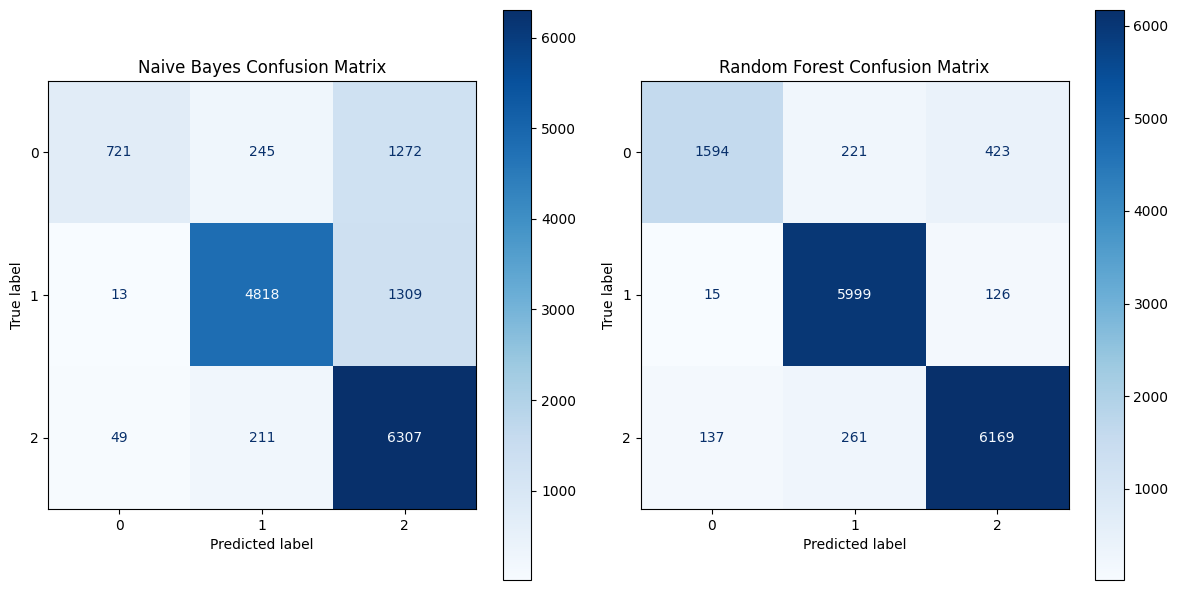

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example predictions (replace these with your actual data)
# y_pred_lr, y_pred_svm from your logistic regression and SVM models
# y_test is your true labels

# Compute confusion matrices
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Define the figure for plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot Logistic Regression Confusion Matrix
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title('Naive Bayes Confusion Matrix')
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True label')

# Plot SVM Confusion Matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(ax=axes[1], cmap=plt.cm.Blues)
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted label')
axes[1].set_ylabel('True label')

# Adjust layout
plt.tight_layout()
plt.show()


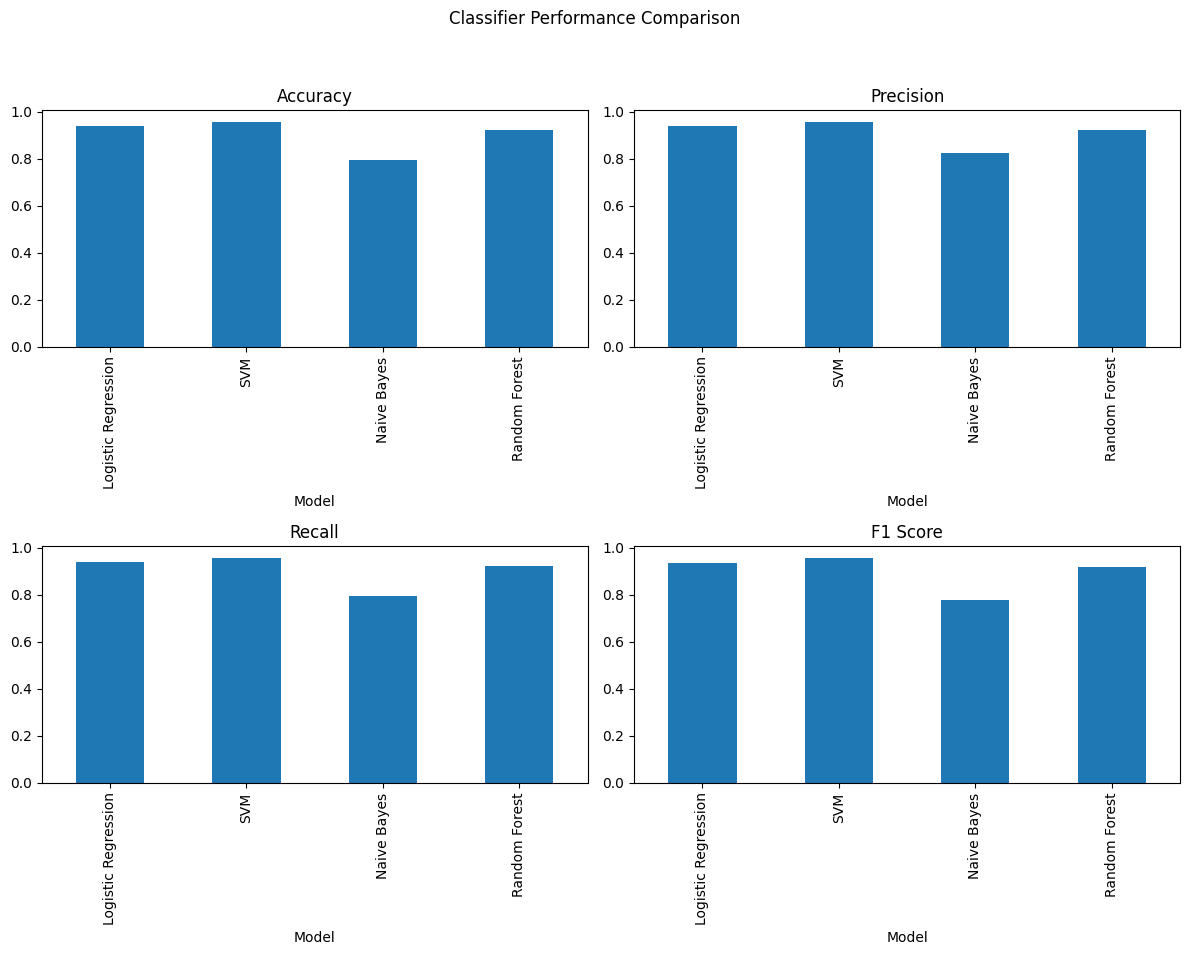

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have predictions for each model on the test set (y_test)
# y_pred_lr, y_pred_svm, y_pred_nb, y_pred_rf represent the predictions from each model

# Calculate the metrics for each model
metrics = {
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Precision': [
        precision_score(y_test, y_pred, average='weighted'),
        precision_score(y_test, y_pred_svm, average='weighted'),
        precision_score(y_test, y_pred_nb, average='weighted'),
        precision_score(y_test, y_pred_rf, average='weighted')
    ],
    'Recall': [
        recall_score(y_test, y_pred, average='weighted'),
        recall_score(y_test, y_pred_svm, average='weighted'),
        recall_score(y_test, y_pred_nb, average='weighted'),
        recall_score(y_test, y_pred_rf, average='weighted')
    ],
    'F1 Score': [
        f1_score(y_test, y_pred, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_nb, average='weighted'),
        f1_score(y_test, y_pred_rf, average='weighted')
    ]
}

# Create a DataFrame for easier visualization
metrics_df = pd.DataFrame(metrics)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Classifier Performance Comparison')

# Plot each metric
metrics_df.plot(x='Model', y='Accuracy', kind='bar', ax=axes[0, 0], legend=False, title='Accuracy')
metrics_df.plot(x='Model', y='Precision', kind='bar', ax=axes[0, 1], legend=False, title='Precision')
metrics_df.plot(x='Model', y='Recall', kind='bar', ax=axes[1, 0], legend=False, title='Recall')
metrics_df.plot(x='Model', y='F1 Score', kind='bar', ax=axes[1, 1], legend=False, title='F1 Score')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [56]:
# Predict probabilities on the test set
y_prob_lr = model.predict_proba(X_test)

# Extract probabilities of the positive class
y_score_lr = y_prob_lr[:, 1]  # Assuming your positive class is at index 1

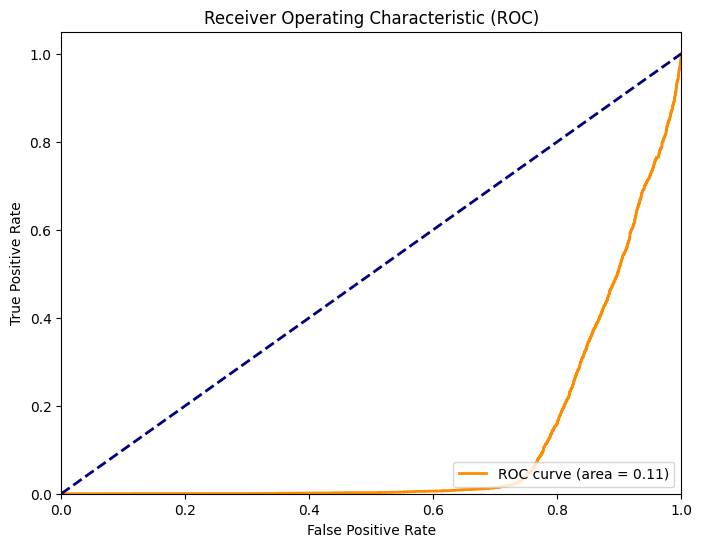

In [57]:
# prompt: check logistic regression auc roc curve

from sklearn.metrics import roc_curve, auc

# Assuming 'y_test' is your true labels and 'y_score_lr' is the predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_score_lr, pos_label='positive') # Assuming 'positive' is the positive class label
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [58]:
# prompt: calculate naive bayes y_score

# Predict probabilities on the test set using the Naive Bayes model
y_prob_nb = nb_model.predict_proba(X_test)

# Extract probabilities of the positive class
y_score_nb = y_prob_nb[:, list(nb_model.classes_).index('positive')] # Assuming your positive class is 'positive'


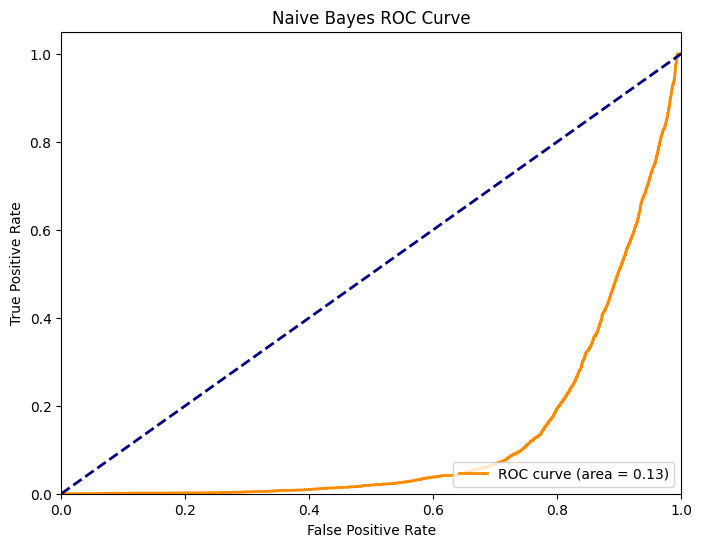

In [59]:
# prompt: Roc auc curve naive bayes

from sklearn.metrics import roc_curve, auc

# Assuming y_pred_nb_prob are the predicted probabilities for the Naive Bayes model
# Get predicted probabilities for the positive class
y_pred_nb_prob = nb_model.predict_proba(X_test)[:, 1]


# Calculate the ROC curve and AUC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_nb_prob, pos_label='positive')
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [60]:
# prompt: calculate random forest y score

# Predict probabilities on the test set using the Random Forest model
y_prob_rf = rf_model.predict_proba(X_test)

# Extract probabilities of the positive class
# Assuming your positive class is at index 1 (adjust if different)
y_score_rf = y_prob_rf[:, list(rf_model.classes_).index('positive')]


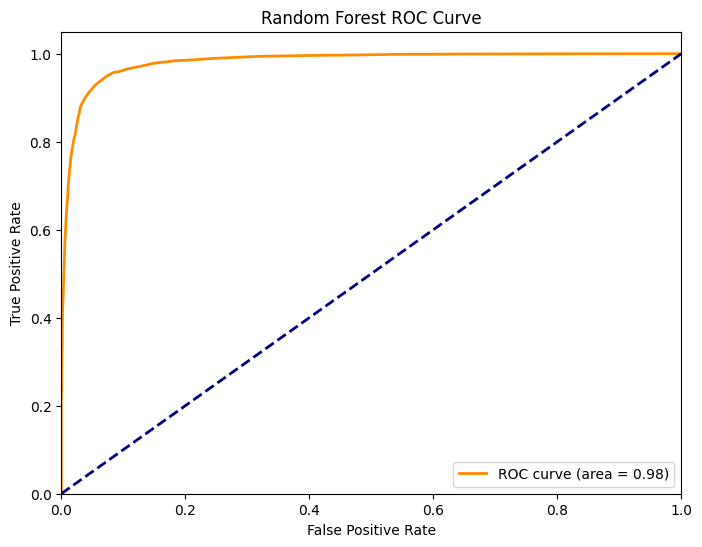

In [61]:
# prompt: draw roc for random forest

from sklearn.metrics import roc_curve, auc


#Use label binarizer to get the right index for the positive class
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit(y_train)
y_test_bin = lb.transform(y_test)
y_score_rf = y_prob_rf[:, list(lb.classes_).index('positive')]

# Calculate the ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_bin[:,list(lb.classes_).index('positive')], y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

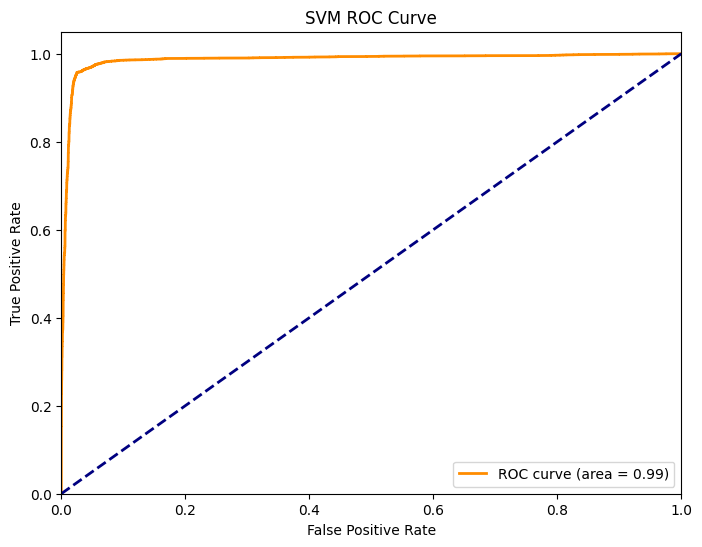

In [ ]:
# prompt: draw svm roc curve

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Predict probabilities on the test set using the SVM model
y_score_svm = svm_model.decision_function(X_test)

#Use label binarizer to get the right index for the positive class
lb = LabelBinarizer()
lb.fit(y_train)
y_test_bin = lb.transform(y_test)

# Get the scores for the positive class only
# Assuming 'positive' is one of your classes
positive_class_index = list(lb.classes_).index('positive')
y_score_svm = y_score_svm[:, positive_class_index] # Select scores for the 'positive' class

# Calculate the ROC curve and AUC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_bin[:, positive_class_index], y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [72]:
# prompt: Can you do two more ML algorithms test on the similar process

from sklearn.neighbors import KNeighborsClassifier



# Initialize the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the KNN model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print("KNN Accuracy:", accuracy_knn)
print("KNN Classification Report:\n", report_knn)




KNN Accuracy: 0.5191702910672465
KNN Classification Report:
               precision    recall  f1-score   support

    negative       0.88      0.18      0.29      2238
     neutral       0.46      0.98      0.63      6140
    positive       0.93      0.20      0.33      6567

    accuracy                           0.52     14945
   macro avg       0.76      0.45      0.42     14945
weighted avg       0.73      0.52      0.45     14945



In [74]:
from sklearn.tree import DecisionTreeClassifier


# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42) # Setting random state for reproducibility

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", report_dt)

Decision Tree Accuracy: 0.9302107728337237
Decision Tree Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.81      0.81      2238
     neutral       0.97      0.98      0.97      6140
    positive       0.93      0.93      0.93      6567

    accuracy                           0.93     14945
   macro avg       0.91      0.90      0.91     14945
weighted avg       0.93      0.93      0.93     14945



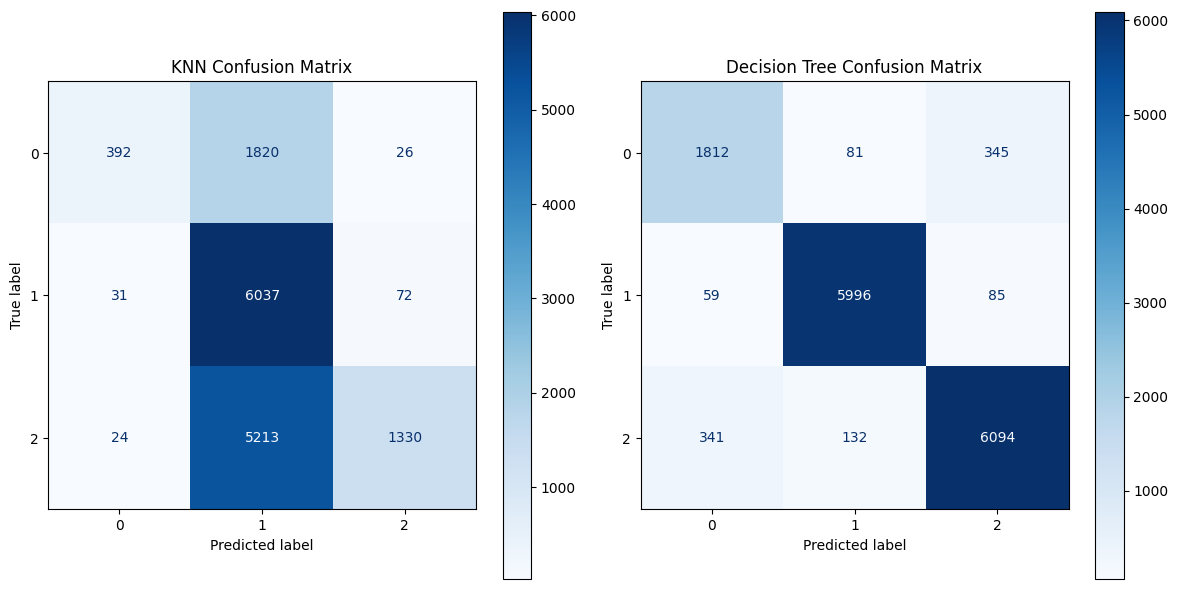

In [75]:
# prompt: Now draw con fusion matrix for knn and dt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_pred_knn and y_pred_dt are your predictions from the KNN and Decision Tree models, respectively.
# Also assuming y_test contains the true labels.

# Compute confusion matrices
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Define the figure for plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot KNN Confusion Matrix
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title('KNN Confusion Matrix')
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True label')

# Plot Decision Tree Confusion Matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot(ax=axes[1], cmap=plt.cm.Blues)
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted label')
axes[1].set_ylabel('True label')

# Adjust layout
plt.tight_layout()
plt.show()

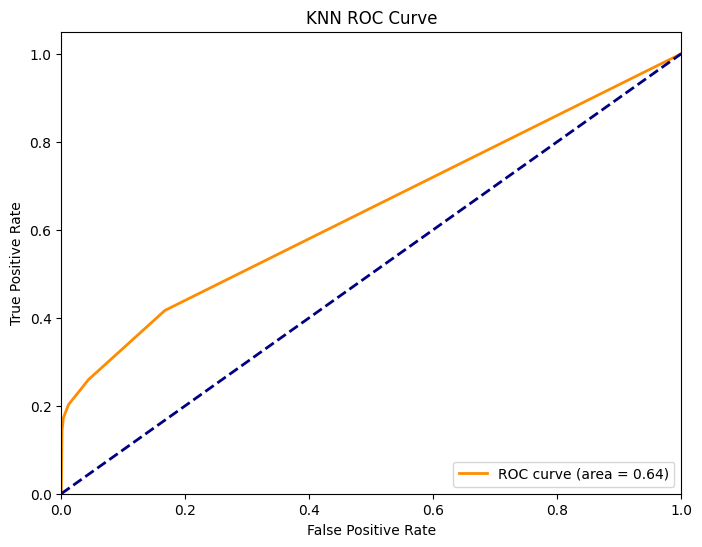

In [76]:
# prompt: draw roc for knn

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Predict probabilities on the test set using the KNN model
y_prob_knn = knn_model.predict_proba(X_test)

#Use label binarizer to get the right index for the positive class
lb = LabelBinarizer()
lb.fit(y_train)
y_test_bin = lb.transform(y_test)

# Get the scores for the positive class only
# Assuming 'positive' is one of your classes
positive_class_index = list(lb.classes_).index('positive')
y_score_knn = y_prob_knn[:, positive_class_index] # Select scores for the 'positive' class

# Calculate the ROC curve and AUC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_bin[:, positive_class_index], y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()

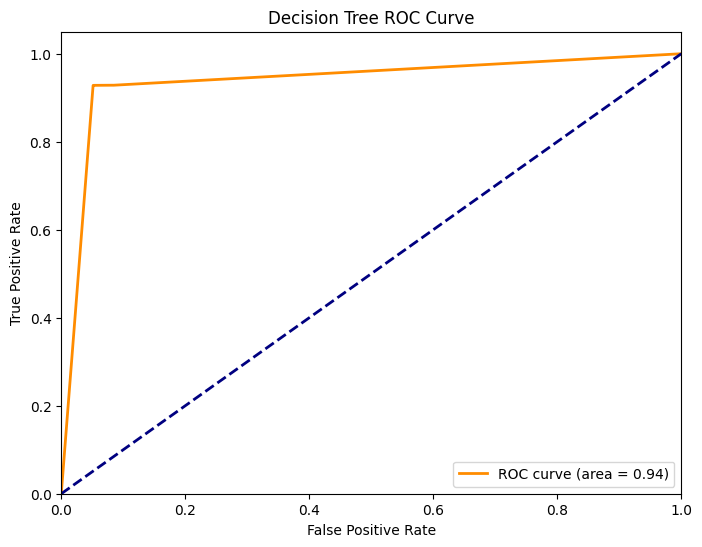

In [77]:
# prompt: draw roc for dt

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Predict probabilities on the test set using the Decision Tree model
y_prob_dt = dt_model.predict_proba(X_test)

#Use label binarizer to get the right index for the positive class
lb = LabelBinarizer()
lb.fit(y_train)
y_test_bin = lb.transform(y_test)

# Get the scores for the positive class only
positive_class_index = list(lb.classes_).index('positive')
y_score_dt = y_prob_dt[:, positive_class_index] # Select scores for the 'positive' class

# Calculate the ROC curve and AUC
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_bin[:, positive_class_index], y_score_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()

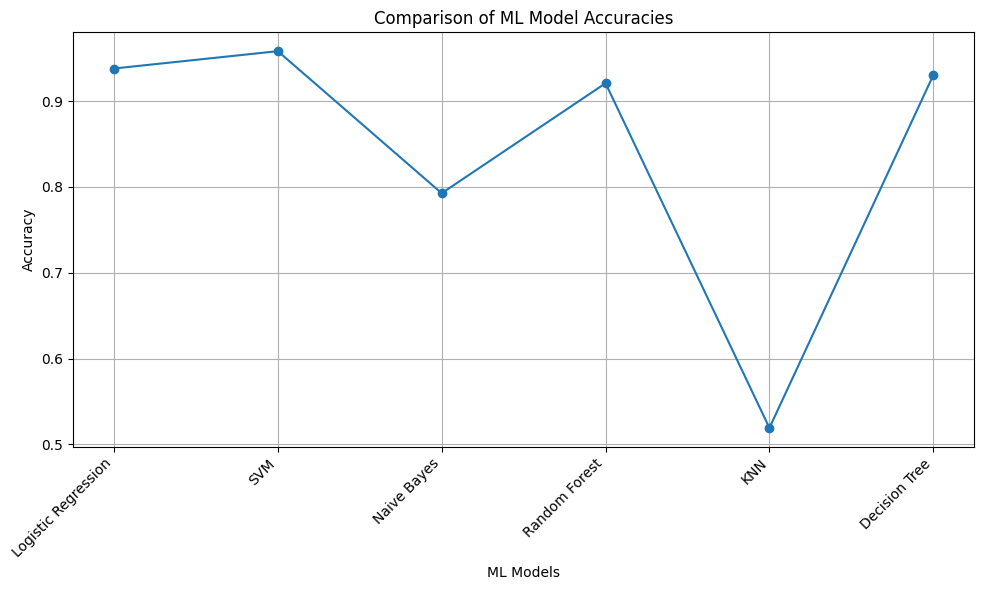

In [80]:
# prompt: create line graph for 6 ml model comparison

import matplotlib.pyplot as plt

# Assuming you have the accuracy scores for each model
model_names = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest', 'KNN', 'Decision Tree']
accuracy_scores = [accuracy, accuracy_svm, accuracy_nb, accuracy_rf, accuracy_knn, accuracy_dt]  # Replace with your actual accuracy scores

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracy_scores, marker='o', linestyle='-')
plt.title('Comparison of ML Model Accuracies')
plt.xlabel('ML Models')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() #Adjust layout to prevent labels from overlapping
plt.show()